## Regresión lineal simple con un perceptrón
En el siguiente ejercicio emplearás el algoritmo de entrenamiento basado en el descenso por gradiente para que un perceptrón aproxime la función del comportamiento del costo de la salud respecto a la edad.
El link de la base de datos:
https://www.kaggle.com/mirichoi0218/insurance

In [ ]:
import pandas as pd               # Librería para manejo de archivos
import matplotlib.pyplot as plt   # Librería para crear graficas
import numpy as np                # Librería para calculos matemáticos

Nota: NO OLVIDES SUBIR EL ARCHIVO 'insurance.csv' A COLABORATORY

In [ ]:
# Lectura de la base de datos
dataset = pd.read_csv('insurance.csv')

In [ ]:
# Visualización del dataframe
dataset

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


En el siguiente bloque de código crearemos un nuevo dataframe 'dataset_edad_cargos' únicamente con las variables 'age' y 'charges' de la variable dataset original. Debido a que, para una misma edad de los usuarios tendremos diferentes cantidades (charges), por ejemplo dos usuarios de 30 años pueden tener cargos de 7086 y 9300 respectivamente, tomaremos el promedio de cargos por edad.

In [ ]:
dataset_edad_cargos = pd.DataFrame(columns = ['age', 'charges'])
for edad in range(18,64):
    cargos = dataset.query('age == '+str(edad)).charges
    cargos_promedio = np.mean(cargos)
    dataset_edad_cargos = dataset_edad_cargos.append({'age' : edad, 'charges' : cargos_promedio}, ignore_index = True)
dataset_edad_cargos

<ipython-input-4-570a14df7fef>:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dataset_edad_cargos = dataset_edad_cargos.append({'age' : edad, 'charges' : cargos_promedio}, ignore_index = True)
<ipython-input-4-570a14df7fef>:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dataset_edad_cargos = dataset_edad_cargos.append({'age' : edad, 'charges' : cargos_promedio}, ignore_index = True)
<ipython-input-4-570a14df7fef>:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dataset_edad_cargos = dataset_edad_cargos.append({'age' : edad, 'charges' : cargos_promedio}, ignore_index = True)
<ipython-input-4-570a14df7fef>:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pand

,age,charges
0,18.0,7086.217556
1,19.0,9747.909335
2,20.0,10159.697736
3,21.0,4730.464330
4,22.0,10012.932802
5,23.0,12419.820040
6,24.0,10648.015962
7,25.0,9838.365311
8,26.0,6133.825309
9,27.0,12184.701721


# Inspección visual de los datos

In [ ]:
# Selección de la variable predictora (x) y la variable objetivo (y)
x = dataset_edad_cargos[['age']]
y = dataset_edad_cargos['charges']

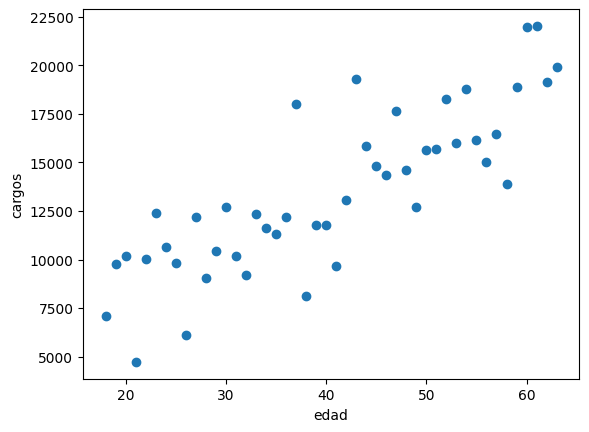

In [ ]:
# Graficamos el costo de seguridad (y) contra la edad (x) en una gráfica de puntos
plt.scatter(x,y)
plt.xlabel('edad')
plt.ylabel('cargos')
plt.show()

## Preprocesamiento de los datos

In [ ]:
type(y)

pandas.core.series.Series

In [ ]:
# Transformamos las variable a arreglos de numpy
x = x.values
y = y.values

In [ ]:
type(x)

numpy.ndarray

In [ ]:
# Escalamiento de los datos
x_max = np.amax(x)
x_min = np.amin(x)
y_max = np.amax(y)
y_min = np.amin(y)
x = (x - x_min)/(x_max - x_min)
y = (y - y_min)/(y_max - y_min)

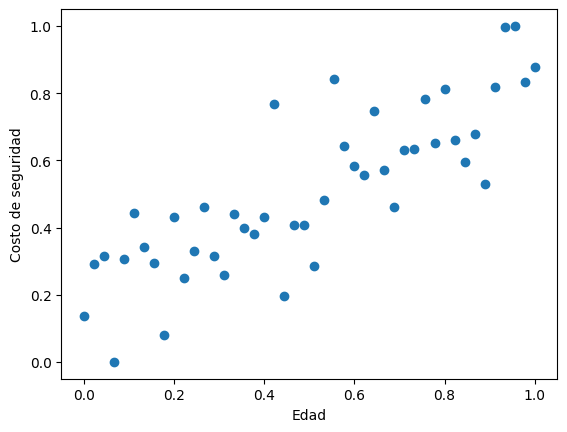

In [ ]:
# Visualización de datos escalados
plt.scatter(x,y)
plt.xlabel('Edad')
plt.ylabel('Costo de seguridad')
plt.show()

## Estimación de los coeficientes del perceptrón
A través del descenso por gradiente

In [ ]:
def sigmoide(z):
  sig = 1/(1+np.exp(-z))
  return sig

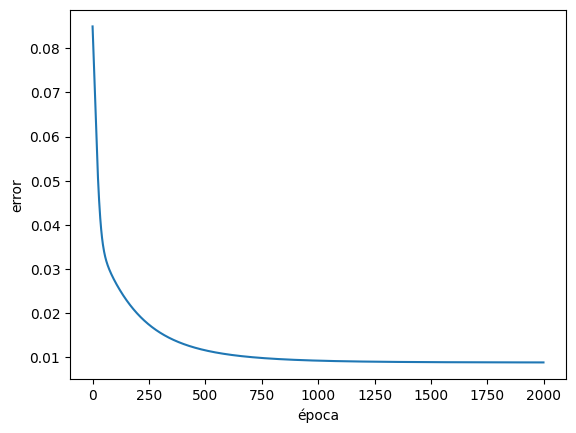

In [ ]:
w = np.random.randn(2) # Coeficientes iniciales
w_i = w
epocas = 2000           # Número de iteraciones
n = 0.6                # Velocidad de aprendizaje
error_hist = []        # Almacenará el historial de error

x_p = np.concatenate((x, np.ones(x.shape)), axis = 1) # Adecuación de los valores de entrada
y_pred_i = sigmoide(np.dot(x_p, w_i))

for epoca in range(epocas):
  error_epoca = 0
  del_w = 0
  for i in range(x_p.shape[0]):
    # Calculamos la salida del perceptrón
    h = np.dot(w, x_p[i])
    y_ = sigmoide(h)
    # Calculamos el error
    error = y[i] - y_
    # Calculamos el termino de error
    error_term = error * sigmoide(h) * (1 - sigmoide(h))
    # Calculamos el cambio en los coeficientes
    del_w += n * error_term * x_p[i]
    # Actualizamos los coeficientes
    #w = w + del_w
    # Guardamos los errores
    error_epoca += 0.5*error**2
  w = w + del_w/x_p.shape[0]
  error_hist.append(error_epoca/x_p.shape[0])

# Gráfica de la evolución del error
plt.figure()
plt.plot(error_hist)
plt.xlabel('época')
plt.ylabel('error')
plt.show()

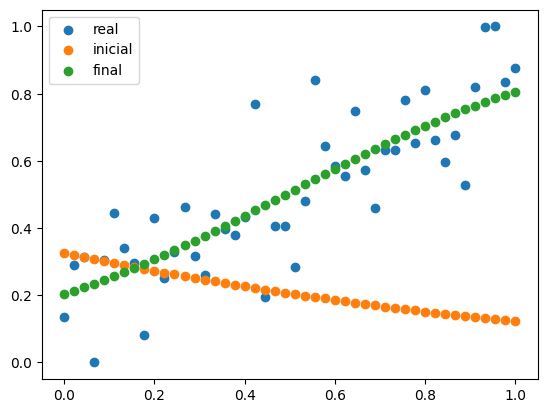

In [ ]:
# Predicciones con los coeficientes finales
y_pred_f = sigmoide(np.dot(x_p, w))

# Grafica de las predicciones
plt.figure()
plt.scatter(x, y, label = 'real')
plt.scatter(x, y_pred_i, label = 'inicial')
plt.scatter(x, y_pred_f, label = 'final')
plt.legend(loc = 'best')
plt.show()

In [ ]:
# Pruebas del modelo
edad = 35
edad_e = (edad - x_min)/(x_max - x_min)
costoInsurance = sigmoide(np.dot(w, [edad_e, 1]))
costo = costoInsurance * (y_max - y_min) + y_min
print(costo)

12029.97638840581
